# Singular Value Decomposition (SVD) Tutorial

Here's how to create an extremely simple example of a dataframe with 2 data points and 2 features, make simple observations about the data, and then explain how SVD breaks down the dataframe into three matrices.

## Prelude:


### **Examples**

#### **Simple Example**

Let’s start by considering a very simple example of real-world data. Imagine we are analyzing two simple products (Data Points) based on two features:

1. **Feature 1**: Price (in dollars)
2. **Feature 2**: Rating (out of 10)

We’ll create a small dataset with just two data points.

In [84]:
import pandas as pd

# Create a simple DataFrame with 2 data points and 2 features
data = {
    'Price': [10, 15],
    'Rating': [8, 7]
}
df = pd.DataFrame(data, index=['Product 1', 'Product 2'])

# Display the DataFrame
print("Original DataFrame:")
display(df)

Original DataFrame:


,Price,Rating
Product 1,10,8
Product 2,15,7


This dataframe looks like this:

|           | Price | Rating |
|-----------|-------|--------|
| **Product 1** | 10    | 8      |
| **Product 2** | 15    | 7      |

#### **Observations:**

1. **Rows (Data Points)**: 
   - **Product 1** has a price of 10 dollars and a rating of 8.
   - **Product 2** has a price of 15 dollars and a rating of 7.

   These rows can be visualized as vectors in a 2-dimensional space, where each axis represents a feature (Price and Rating).

2. **Columns (Features)**:
   - **Price** varies from 10 to 15 across the two products.
   - **Rating** varies from 7 to 8.

   These columns can also be visualized as vectors in a 2-dimensional space, where each axis represents a data point (Product 1 and Product 2).

#### **Visualizing the Data**

Let's plot these rows and columns as vectors to understand their variation.

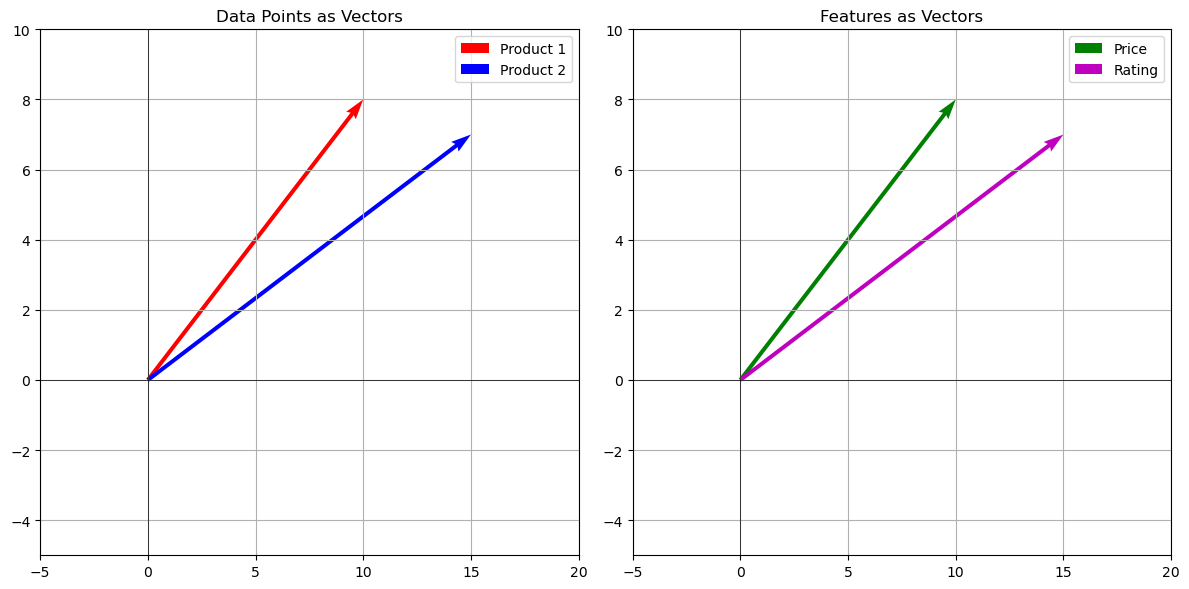

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# # Create a simple DataFrame with 2 data points and 2 features
# data = {
#     'Price': [10, 15],
#     'Rating': [8, 7]
# }
# df = pd.DataFrame(data, index=['Product 1', 'Product 2'])

# Extract rows (Data Points) and columns (Features) as vectors
row_vectors = df.values
column_vectors = df.T.values

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Data Points as row vectors in the first subplot
ax1.quiver(0, 0, row_vectors[0, 0], row_vectors[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='Product 1')
ax1.quiver(0, 0, row_vectors[1, 0], row_vectors[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='Product 2')
ax1.set_xlim(-5, 20)
ax1.set_ylim(-5, 10)
ax1.axhline(0, color='black',linewidth=0.5)
ax1.axvline(0, color='black',linewidth=0.5)
ax1.grid(True)
ax1.legend()
ax1.set_title("Data Points as Vectors")

# Plot Feature vectors in the second subplot
ax2.quiver(0, 0, column_vectors[0, 0], column_vectors[1, 0], angles='xy', scale_units='xy', scale=1, color='g', label='Price')
ax2.quiver(0, 0, column_vectors[0, 1], column_vectors[1, 1], angles='xy', scale_units='xy', scale=1, color='m', label='Rating')
ax2.set_xlim(-5, 20)
ax2.set_ylim(-5, 10)
ax2.axhline(0, color='black',linewidth=0.5)
ax2.axvline(0, color='black',linewidth=0.5)
ax2.grid(True)
ax2.legend()
ax2.set_title("Features as Vectors")

plt.tight_layout()
plt.show()


### **Extended Example with More Dimensions**

Let’s consider a dataset with 3 data points (Products) and 4 features (Price, Rating, Weight, and Size). This dataset will be represented by a matrix $A$ of size $3 \times 4$.

#### **Example Data**

|         | Price | Rating | Weight | Size |
|---------|-------|--------|--------|------|
| Product 1 |  10   |   8    |  1.5   |  5   |
| Product 2 |  20   |   6    |  2.0   | 10   |
| Product 3 |  30   |   9    |  3.0   |  7   |

This table represents three products, each characterized by four features.

#### **SVD Decomposition**

When we apply Singular Value Decomposition (SVD) to the $3 \times 4$ matrix $A$, it will decompose into three matrices:

1. **Original Matrix $A$**:
   - Dimensions: $3 \times 4$ (3 Products × 4 Features)

2. **Decomposed Matrices**:
   - **$U$**: Contains the left singular vectors (directions of maximum variance in the data space).
     - Dimensions: $3 \times 3$
   - **$\Sigma$**: Contains the singular values (representing variance magnitude).
     - Dimensions: $3 \times 3$ (typically shown as a diagonal matrix)
   - **$V^T$**: Contains the right singular vectors (directions of maximum variance in the feature space).
     - Dimensions: $3 \times 4$

#### **Breaking Down the Decomposition**

The decomposition can be written as:

$$
A = U \cdot \Sigma \cdot V^T
$$

Where:

- **$U$** represents the original data points (Products) in a new coordinate system defined by the left singular vectors. 
  - Size: $3 \times 3$
  
- **$\Sigma$** contains the singular values along its diagonal, which capture the magnitude of variance in the data.
  - Size: $3 \times 3$ (usually as a square diagonal matrix)
  
- **$V^T$** represents the features in a new coordinate system defined by the right singular vectors.
  - Size: $3 \times 4$

Thus, the dimensions of the matrices can be expressed as:

$$
\text{Dimensions:} \quad (3 \times 4) = (3 \times 3) \cdot (3 \times 3) \cdot (3 \times 4)
$$

#### **Interpretation**

- **Data Points as Vectors**: In this decomposition, each data point (Product) can be seen as a vector in a space defined by the features (Price, Rating, Weight, Size). The matrix $U$ captures the orientation of these vectors.
- **Features as Vectors**: Similarly, each feature can be seen as a vector in a space defined by the data points. The matrix $V^T$ captures the orientation of these feature vectors.
- **Singular Values ($\Sigma$)**: The singular values tell us how much of the original data's variance is captured by each corresponding vector in $U$ and $V^T$. Larger singular values correspond to directions with more significant variance.

By breaking down $A$ into $U$, $\Sigma$, and $V^T$, we gain a deeper understanding of the structure of our data. For instance, if we wanted to reduce the dimensionality of the data, we could focus on the top singular values and corresponding vectors in $U$ and $V^T$, thereby retaining the most critical information while discarding less significant variations.

#### 1. **Introduction**

Singular Value Decomposition (SVD) is a fundamental matrix factorization technique in linear algebra, widely used in various machine learning and data analysis tasks. SVD decomposes a matrix into three component matrices, which can be utilized for dimensionality reduction, noise reduction, and data compression. This tutorial will guide you through the high-level intuitions, detailed explanations, examples, and mathematical implementations of SVD.

### 2. **High-Level Intuition**

#### **What is SVD?**
- **Purpose**: SVD is used to decompose a matrix into three simpler matrices, which can help in understanding the structure of the original matrix. It is particularly useful in reducing the dimensionality of data, removing noise, and improving computational efficiency.
- **Analogy**: Think of SVD as a way to break down a complex data matrix into simpler, interpretable parts, similar to how a sentence can be broken down into words, each with its own meaning.

#### **Applications of SVD**
- **Dimensionality Reduction**: Reducing the number of variables under consideration while retaining the essential information.
- **Noise Reduction**: Removing insignificant components that may introduce noise.
- **Data Compression**: Reducing the size of data by approximating it with fewer components.
- **Latent Semantic Analysis (LSA)**: Used in Natural Language Processing (NLP) to uncover hidden structures in text data.

### 3. **Detailed Explanation**

#### **Mathematical Definition**

Given a matrix $A$ of dimensions $m \times n$, SVD decomposes $A$ into three matrices:

$$ A = U \Sigma V^T $$

Where:
- **$U$**: An $m \times m$ orthogonal matrix, whose columns are the left singular vectors of $A$.
- **$\Sigma$**: An $m \times n$ diagonal matrix, whose diagonal elements are the singular values of $A$ (these values are non-negative and sorted in descending order).
- **$V^T$**: The transpose of an $n \times n$ orthogonal matrix, whose columns are the right singular vectors of $A$.

#### **Interpretation of Components**

1. **$U$ Matrix**: Represents the original data in a new coordinate system where the basis vectors (columns of $U$) are the left singular vectors. These vectors capture the directions of maximum variance in the data.

2. **$\Sigma$ Matrix**: Contains the singular values, which represent the magnitude of the variance captured by each singular vector. Larger singular values correspond to directions in the data with more significant variance.

3. **$V^T$ Matrix**: Contains the right singular vectors, which can be thought of as the principal components in the context of Principal Component Analysis (PCA).

### 4. **Examples**

#### **Simple Example**

Consider a simple matrix $A$:

$$ A = \begin{bmatrix} 1 & 0 & 0 & 0 & 2 \\ 0 & 0 & 3 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 \\ 0 & 4 & 0 & 0 & 0 \end{bmatrix} $$

To compute the SVD of $A$, we can use Python:

In [89]:
import numpy as np

A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 4, 0, 0, 0]])

# Compute the SVD
U, Sigma, Vt = np.linalg.svd(A)

# Print the components
print("U matrix:\n", U)
print("\nSigma values:\n", Sigma)
print("\nVt matrix:\n", Vt)

U matrix:
 [[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0.  0.  0.]]

Sigma values:
 [4.         3.         2.23606798 0.        ]

Vt matrix:
 [[ 0.         -1.          0.          0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


This code will output the matrices $U$, $\Sigma$, and $V^T$ for the matrix $A$. Note that $\Sigma$ is often returned as a vector of singular values rather than a full diagonal matrix.

### 5. **Mathematics Behind SVD**

#### **Geometric Interpretation**

- **Singular Values**: The singular values in $\Sigma$ represent the length of the semi-axes of an ellipsoid that is the image of the unit sphere under the transformation defined by $A$. The number of non-zero singular values equals the rank of the matrix $A$.
- **Singular Vectors**: The columns of $U$ and $V$ represent orthogonal directions in the input and output spaces, respectively.

#### **Relation to Eigenvalues and Eigenvectors**

- The left singular vectors (columns of $U$) are the eigenvectors of $AA^T$.
- The right singular vectors (columns of $V$) are the eigenvectors of $A^TA$.
- The non-zero singular values are the square roots of the non-zero eigenvalues of both $AA^T$ and $A^TA$.

### 6. **Applications and Examples**

#### **Dimensionality Reduction**

In data analysis, dimensionality reduction is often used to reduce the number of features while preserving as much information as possible. SVD can be used to achieve this by keeping only the largest singular values and their corresponding singular vectors.

In [2]:
# Reducing the dimensionality by keeping only the top 2 singular values
k = 2
U_reduced = U[:, :k]
Sigma_reduced = np.diag(Sigma[:k])
Vt_reduced = Vt[:k, :]

# Reconstruct the reduced matrix
A_reduced = np.dot(U_reduced, np.dot(Sigma_reduced, Vt_reduced))
print("Reduced Matrix A:\n", A_reduced)

Reduced Matrix A:
 [[0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]]


#### **Latent Semantic Analysis (LSA) in NLP**

In Natural Language Processing (NLP), SVD is used for Latent Semantic Analysis (LSA) to discover hidden relationships between terms in a text corpus. This is done by applying SVD to the term-document matrix and reducing its dimensionality to reveal the latent structure.

### 7. **Plotting the SVD Components**

To visualize the effects of SVD, let's plot the original data and its reduced form.

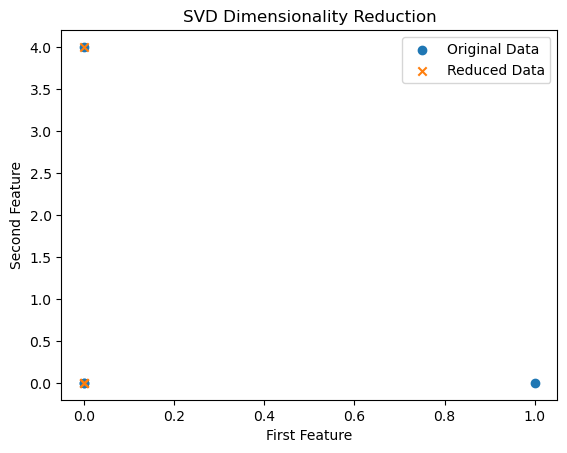

In [8]:
import matplotlib.pyplot as plt

# Original data
plt.scatter(A[:, 0], A[:, 1], label='Original Data')

# Reduced data
plt.scatter(A_reduced[:, 0], A_reduced[:, 1], label='Reduced Data', marker='x')

plt.title("SVD Dimensionality Reduction")
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend()
plt.show()

### 8. **SVD in Image Compression**

One practical application of SVD is in image compression, where an image is represented as a matrix of pixel values. By keeping only the largest singular values and their corresponding singular vectors, we can approximate the original image with significantly less data.

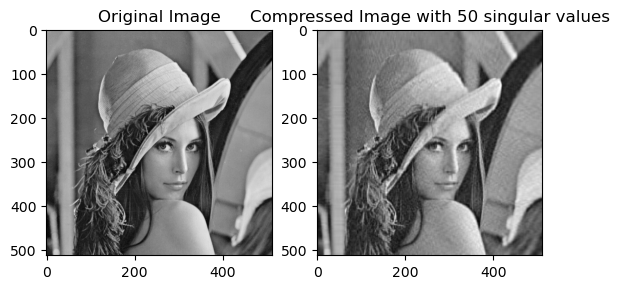

In [6]:
import matplotlib.image as mpimg

# Load an image as a matrix
img = mpimg.imread('Lenna.png')
img_gray = np.mean(img, axis=2)  # Convert to grayscale

# Compute SVD
U, Sigma, Vt = np.linalg.svd(img_gray, full_matrices=False)

# Keep only the top k singular values
k = 50
img_reduced = np.dot(U[:, :k], np.dot(np.diag(Sigma[:k]), Vt[:k, :]))

# Plot the original and compressed image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Compressed Image with {k} singular values')
plt.imshow(img_reduced, cmap='gray')

plt.show()

### 9. **Understanding SVD in Noise Reduction**

In noise reduction, SVD can help by removing smaller singular values that may represent noise rather than signal. By reconstructing the matrix using only the largest singular values, we effectively filter out noise.

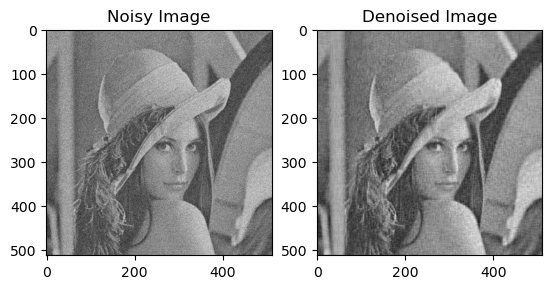

In [7]:
# Introduce noise to the image
noise = np.random.normal(0, 0.1, img_gray.shape)
img_noisy = img_gray + noise

# Perform SVD and reconstruct the image using only significant singular values
U, Sigma, Vt = np.linalg.svd(img_noisy, full_matrices=False)
k = 50
img_denoised = np.dot(U[:, :k], np.dot(np.diag(Sigma[:k]), Vt[:k, :]))

# Plot the noisy and denoised image
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(img_noisy, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(img_denoised, cmap='gray')

plt.show()

### 10. **Conclusion**

SVD is a powerful tool in linear algebra with numerous applications in machine learning, data compression, noise reduction, and natural language processing. Understanding the mechanics of SVD allows you to apply it effectively across different domains, whether you're working with images, text, or general data matrices. Through this tutorial, you should now have a solid understanding of both the intuition and mathematics behind SVD, as well as practical implementations and applications.

### 11. **Further Reading and Practice**

- Explore more about PCA, which is closely related to SVD.
- Practice using SVD on real datasets, such as the MNIST dataset for digit recognition or movie recommendation systems.
- Experiment with different values of $k$ in dimensionality reduction to

 see how it affects the accuracy and performance of your models.

Understanding and mastering SVD will significantly enhance your ability to work with high-dimensional data and complex datasets in machine learning and data science.

### Some graphical visualizations

<IPython.core.display.Math object>

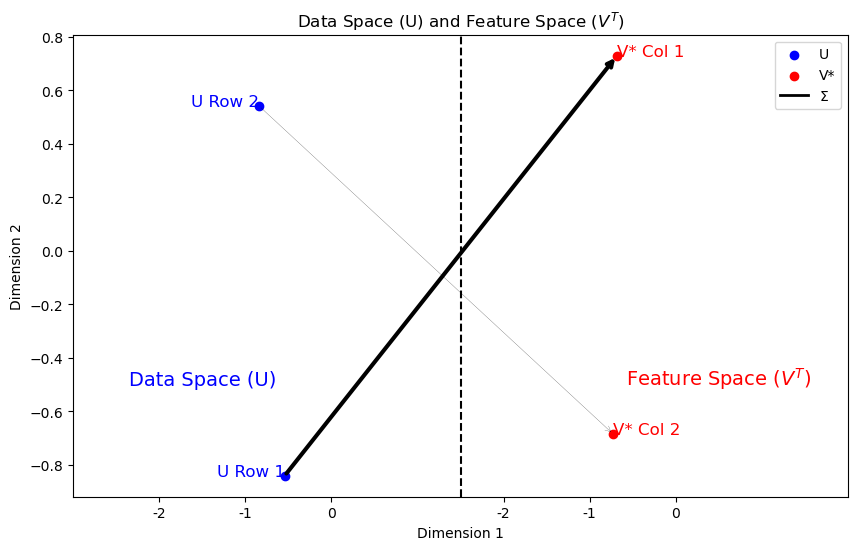

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Step 1: Create a random 2x2 data matrix A
A = np.random.randint(1, 10, (2, 2))

# Step 2: Compute the SVD
U, S, Vt = np.linalg.svd(A)

# Function to convert matrices to LaTeX strings with rounding
def to_latex(matrix, decimals=2):
    rounded_matrix = np.round(matrix, decimals)  # Round matrix entries
    return r"\begin{pmatrix}" + \
           r" \\".join([" & ".join(map(str, row)) for row in rounded_matrix]) + \
           r"\end{pmatrix}"

# Convert each matrix to LaTeX with rounded values
A_latex = to_latex(A)
U_latex = to_latex(U)
Sigma_latex = to_latex(np.diag(S))
Vt_latex = to_latex(Vt)

# Combine into one equation with symbols directly above their corresponding matrices
full_equation = f"""
\\begin{{array}}{{c@{{}}c@{{}}c@{{}}c@{{}}c}}
\\text{{A}} & = & \\text{{U}} & \\cdot & \\Sigma & \\cdot & \\text{{V}}^T \\\\
{A_latex} & = & {U_latex} & \\cdot & {Sigma_latex} & \\cdot & {Vt_latex}
\\end{{array}}
"""

# Display the equation
display(Math(full_equation))

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Offset to create space between U and V*
offset = 4  # Reduced offset to balance the axis

# Plot U (Data Space) on the left
for i in range(U.shape[0]):
    ax.scatter(U[i, 0], U[i, 1], color='blue', label='U' if i == 0 else "")
    ax.text(U[i, 0], U[i, 1], f'U Row {i+1}', fontsize=12, ha='right', color='blue')

# Plot V* (Feature Space) on the right without changing x values
for i in range(Vt.shape[1]):
    ax.scatter(Vt[0, i] + offset, Vt[1, i], color='red', label='V*' if i == 0 else "")
    ax.text(Vt[0, i] + offset, Vt[1, i], f'V* Col {i+1}', fontsize=12, ha='left', color='red')

# Draw directed edges between corresponding points in U and V* spaces with thickness based on Sigma
for i in range(len(S)):
    ax.annotate("",
                xy=(Vt[0, i] + offset, Vt[1, i]), 
                xytext=(U[i, 0], U[i, 1]),
                arrowprops=dict(arrowstyle="->", color="black", lw=S[i] * .25),  # Adjust the lw factor to change thickness scaling
                )

# Add titles and labels
ax.set_title("Data Space (U) and Feature Space ($V^T$)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

# Customize the grid and legend
ax.grid(False)
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'$\Sigma$'))
labels.append(r'$\Sigma$')

# Offset to create space between U and V*
offset = 4.5  # Adjusted offset for better centering

# Adjust limits and break x-axis visually
ax.set_xlim([-3, 6])  # Adjust to ensure proper space on the right-hand side
ax.set_xticks([-2, -1, 0, 2, 3, 4])  # Corrected tick marks

# Add vertical line to simulate broken axis
ax.axvline(x=1.5, color='black', linestyle='--')

# Manually adjust the tick labels to make the "break" visible
ax.set_xticklabels(['-2', '-1', '0', '-2', '-1', '0'])

# Add labels to indicate the separate spaces
ax.text(-1.5, -0.5, 'Data Space (U)', fontsize=14, color='blue', ha='center')
ax.text(4.5, -0.5, 'Feature Space ($V^T$)', fontsize=14, color='red', ha='center')

# Display the legend with the Sigma label
ax.legend(handles=handles, labels=labels, loc='upper right')

plt.show()


This figure illustrates the relationship between the Data Space (U) and Feature Space (V^T) derived from the Singular Value Decomposition (SVD) of matrix A. 

### Interpretation:

1. **$U$ (Data Space)**: 
   - The blue points on the left side represent the rows of the matrix U, which are the left singular vectors. These vectors capture the directions in the data space that correspond to the principal components of the original matrix A.

2. **$V^T$ (Feature Space)**: 
   - The red points on the right side represent the columns of $V^T$, which are the right singular vectors. These vectors define the directions in the feature space that correspond to the principal components of the original matrix A.

3. **$\Sigma$**: 
   - The black arrows connecting the points in U to the corresponding points in $V^T$ represent the singular values in the diagonal matrix $\Sigma$. The thickness of these arrows is proportional to the magnitude of the singular values, indicating the strength of the relationship between the corresponding vectors in U and $V^T$. A thicker arrow means a larger singular value, implying that the corresponding direction contributes more significantly to the structure of the original matrix A.
